In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class RBM(nn.Module):
    def __init__(self, num_visible, num_hidden):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(num_hidden, num_visible))
        self.v_bias = nn.Parameter(torch.randn(num_visible))
        self.h_bias = nn.Parameter(torch.randn(num_hidden))

    def forward(self, v):
        h_probs = torch.sigmoid(torch.matmul(v, self.W.t()) + self.h_bias)
        h_states = torch.bernoulli(h_probs)
        v_probs = torch.sigmoid(torch.matmul(h_states, self.W) + self.v_bias)
        return v_probs

In [39]:
def train_rbm(rbm, train_loader, learning_rate=0.1, num_epochs=10):
    optimizer = optim.SGD(rbm.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.view(data.size(0), -1)
            optimizer.zero_grad()
            recon = rbm(data)
            loss = torch.mean(torch.sum((data - recon)**2, dim=1))
            loss.backward()
            optimizer.step()

In [40]:
def evaluate_rbm(rbm, data_loader):
    with torch.no_grad():
        recon_errors = []
        for batch_idx, (data, _) in enumerate(data_loader):
            data = data.view(data.size(0), -1)
            recon = rbm(data)
            recon_error = torch.mean(torch.sum((data - recon)**2, dim=1))
            recon_errors.append(recon_error.item())
        return np.mean(recon_errors)

In [41]:
def plot_pca(data, labels):
    pca = PCA(n_components=2)
    transformed = pca.fit_transform(data)
    plt.scatter(transformed[:, 0], transformed[:, 1], c=labels)
    plt.show()

In [42]:
train_dataset = datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
train_dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [43]:
train_data = train_dataset.data.numpy().reshape(len(train_dataset), -1)
train_labels = train_dataset.targets.numpy()

In [44]:
train_data=train_data[:10]
train_labels=train_labels[:10]

Hidden size: 4, Reconstruction error: 58.27190400187175


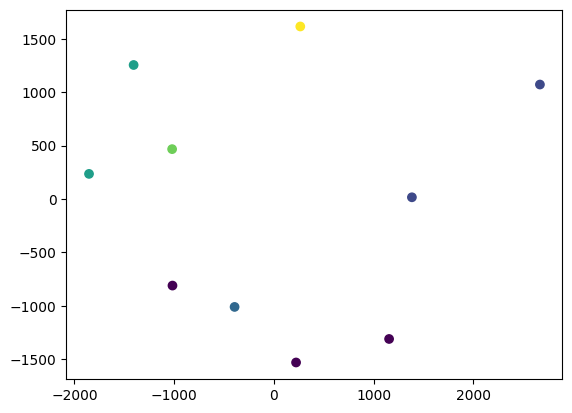

Hidden size: 8, Reconstruction error: 54.824672403971356


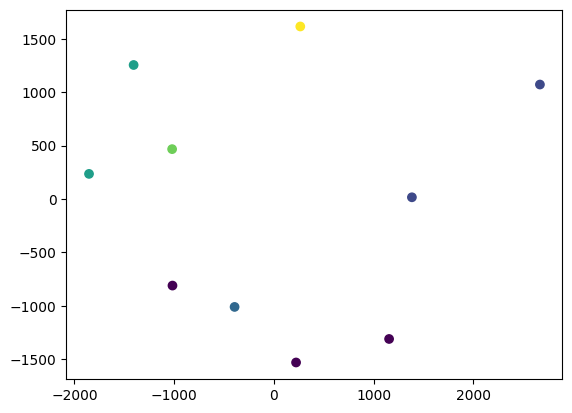

Hidden size: 16, Reconstruction error: 56.5041153116862


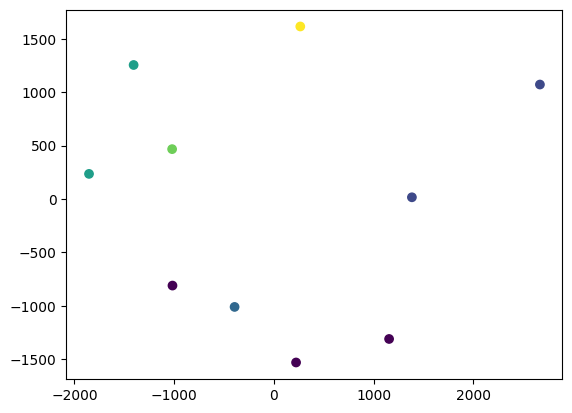

Hidden size: 32, Reconstruction error: 51.96916967773438


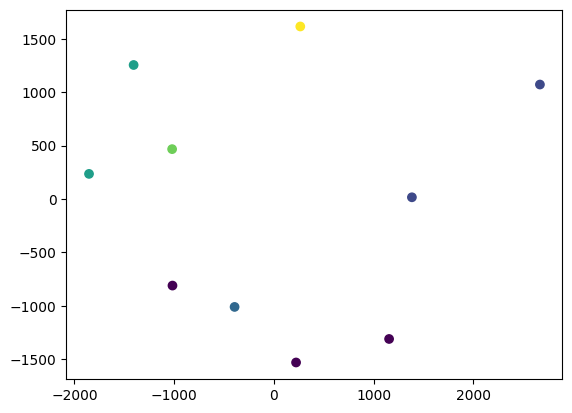

Hidden size: 64, Reconstruction error: 49.96231103719076


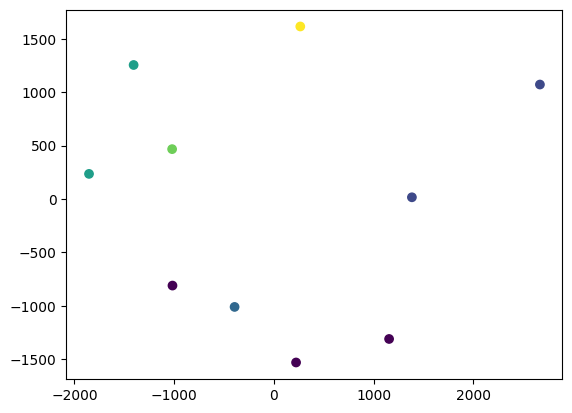

Hidden size: 128, Reconstruction error: 45.02865233561198


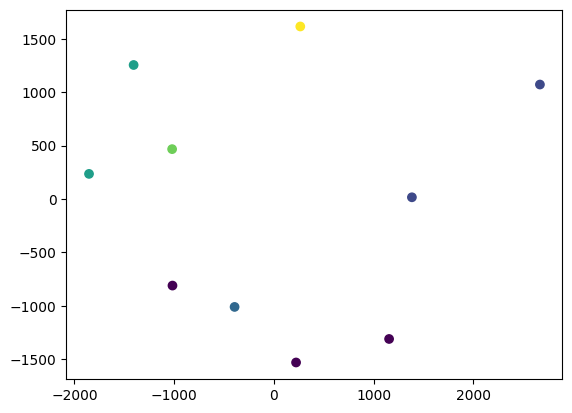

In [45]:
hidden_sizes = [4, 8, 16, 32, 64, 128]

for hidden_size in hidden_sizes:
    rbm = RBM(28*28, hidden_size)
    train_rbm(rbm, train_loader, num_epochs=10)
    recon_error = evaluate_rbm(rbm, train_loader)
    print(f'Hidden size: {hidden_size}, Reconstruction error: {recon_error}')
    plot_pca(train_data, train_labels)